In [30]:
import matplotlib
matplotlib.use("pgf")
import os
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.serif': 'lm',
    'font.size': '11',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
from matplotlib.colors import hsv_to_rgb
from matplotlib.colors import ListedColormap
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpecFromSubplotSpec
import pandas as pd
MODALITY = 'asymmetry'
IMPUTE_ID = 'mean_imputed'
SUBSAMPLED_ID = 'not_subsampled'
PARTITIONS_DIR = f"../../results/{MODALITY}/visualizeCCAOnPheno/joinedDatasets/{IMPUTE_ID}/{SUBSAMPLED_ID}/props"
RESULTS_DIR = f"../../results/{MODALITY}/FUMA gene2func/joinedDatasets/{IMPUTE_ID}/{SUBSAMPLED_ID}"

OUTPUT_DIR = RESULTS_DIR+'/partitionsSummary/'
os.makedirs(OUTPUT_DIR,exist_ok=True)

In [31]:
def load_df(name):
    df = None
    for par in [1,4,5,6,7]:
        tab = pd.read_csv(f"{RESULTS_DIR}/par{par:02d}/{name}.txt",sep='\t')
        tab['partition'] = par
        if df is None:
            df = tab
        else:
            df = pd.concat([df, tab])
    return df
functions_df = load_df("GS")
deg_df = load_df("gtex_v8_ts_DEG")
deg_df = deg_df.sort_values('adjP').groupby(['GeneSet','partition']).first() # keep only lowest p value type per gene set and partition

In [32]:
functions_df.shape

(647, 9)

In [33]:
functions_df.head()

,Category,GeneSet,N_genes,N_overlap,p,adjP,genes,link,partition
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION,528,10,4.843584e-07,0.003214,TUBA1B:TUBA1A:TUBA1C:CHMP1A:SPIRE2:TUBB3:TUBB3...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
1,GO_bp,GO_MICROTUBULE_BASED_PROCESS,726,11,1.119068e-06,0.003214,TUBA1B:TUBA1A:TUBA1C:RASGRP1:CHMP1A:SPIRE2:TUB...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
2,GO_bp,GO_REGULATION_OF_CELLULAR_COMPONENT_BIOGENESIS,901,12,1.345885e-06,0.003214,TRABD2B:DACT1:THBS1:CHMP1A:CDK10:SPIRE2:DEF8:P...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
3,GO_bp,GO_CYTOSKELETON_ORGANIZATION,1285,14,1.749016e-06,0.003214,TUBA1B:TUBA1A:TUBA1C:FMNL3:DAAM1:CHMP1A:CDK10:...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
4,GO_bp,GO_ORGANELLE_LOCALIZATION,684,10,4.891740e-06,0.007191,TUBA1A:RASGRP1:CHMP1A:SPIRE2:DEF8:PLEKHM1:CRHR...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1


In [34]:
functions_df.Category.unique()

array(['GO_bp', 'GWAScatalog', 'Chemical_and_Genetic_pertubation',
       'GO_cc', 'Immunologic_signatures', 'Positional_gene_sets',
       'Wikipathways', 'Curated_gene_sets', 'Oncogenic_signatures',
       'KEGG', 'microRNA_targets', 'TF_targets', 'Reactome',
       'Canonical_Pathways', 'Hallmark_gene_sets', 'GO_mf', 'BioCarta',
       'Cancer_gene_neighborhoods', 'Computational_gene_sets'],
      dtype=object)

In [35]:
functions_df.sort_values('adjP').groupby(['Category','partition']).first()

GeneSet  \
Category                         partition                                                      
BioCarta                         6                            BIOCARTA_AKAPCENTROSOME_PATHWAY   
Cancer_gene_neighborhoods        6                                                 MORF_PTPRR   
Canonical_Pathways               1           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
                                 6           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
Chemical_and_Genetic_pertubation 1                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 4                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 5                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 6                     SOTIRIOU_BREAST_CANCER_GRADE_1_VS_3_UP   
                                 7                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
Computational_gene_sets          6                                                 MODULE_198   
Curated_gene_sets                1                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 4                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 5                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 6           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
                                 7                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
GO_bp                            1                   GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION   
                                 5             GO_REGULATION_OF_CELLULAR_COMPONENT_BIOGENESIS   
                                 6          GO_CYTOSKELETON_DEPENDENT_INTRACELLULAR_TRANSPORT   
GO_cc                            1                                GO_MICROTUBULE_CYTOSKELETON   
                                 5                                GO_MICROTUBULE_CYTOSKELETON   
                                 6                                             GO_MICROTUBULE   
GO_mf                            5                            GO_CYTOSKELETAL_PROTEIN_BINDING   
                                 6                               GO_GUANYL_NUCLEOTIDE_BINDING   
GWAScatalog                      1                             Red vs. brown/black hair color   
                                 4             Handedness (Right-handed vs. non-right-handed)   
                                 5                                      Male-pattern baldness   
                                 6               Handedness (Left-handed vs. non-left-handed)   
                                 7             Handedness (Right-handed vs. non-right-handed)   
Hallmark_gene_sets               5                                      HALLMARK_ADIPOGENESIS   
Immunologic_signatures           1          GSE24634_IL4_VS_CTRL_TREATED_NAIVE_CD4_TCELL_D...   
                                 4          GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT...   
                                 6                             GSE12366_GC_VS_MEMORY_BCELL_UP   
KEGG                             1                 KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION   
                                 6                 KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION   
Oncogenic_signatures             1                                            ATF2_S_UP.V1_DN   
                                 5                                     KRAS.PROSTATE_UP.V1_DN   
Positional_gene_sets             1                                                   chr16q24   
                                 4                                                   chr16q24   
                                 5                                                   chr16q24   
                                 6                                                   chr12q13   
            

In [36]:
top_val = 1
go_cc_per_partition_df = functions_df.sort_values('adjP').query(f'(Category=="GO_cc") & (adjP<{top_val})').pivot_table(columns='partition', values='adjP',index='GeneSet')
go_mf_per_partition_df = functions_df.sort_values('adjP').query(f'(Category=="GO_mf") & (adjP<{top_val})').pivot_table(columns='partition', values='adjP',index='GeneSet')
go_bp_per_partition_df = functions_df.sort_values('adjP').query(f'(Category=="GO_bp") & (adjP<{top_val})').pivot_table(columns='partition', values='adjP',index='GeneSet')
canonical_pathways_per_partition_df = functions_df.sort_values('adjP').query(f'(Category=="Canonical_Pathways") & (adjP<{top_val})').pivot_table(columns='partition', values='adjP',index='GeneSet')


In [37]:
functions_per_partition_df = functions_df.sort_values('adjP').query(f'(Category=="GWAScatalog") & (adjP<{top_val})').pivot_table(columns='partition', values='adjP',index='GeneSet')
functions_per_partition_df

partition,1,4,5,6,7
GeneSet,,,,,
Alcohol use disorder (total score),1.274981e-07,1.677880e-11,2.045014e-12,1.483805e-12,6.702837e-13
Alzheimer's disease in APOE e4- carriers,3.731101e-04,2.038641e-05,8.412608e-05,7.638447e-06,3.616962e-06
Bipolar disorder,1.380983e-02,NaN,NaN,1.758043e-04,NaN
Blond vs. brown/black hair color,3.096164e-02,4.447542e-02,1.070701e-02,NaN,1.318466e-02
Brown vs. black hair color,2.642386e-04,1.012013e-03,6.329440e-05,3.456817e-02,2.804684e-04
Chronotype,2.426054e-02,NaN,NaN,NaN,NaN
Cognitive ability,NaN,NaN,NaN,4.868617e-02,3.240468e-02
Cognitive function,5.083960e-03,9.827950e-03,1.839249e-06,5.948930e-03,2.874780e-03
Dentate gyrus granule cell layer volume,NaN,NaN,8.412608e-05,NaN,NaN


In [38]:
def create_cmap(hue=0):
    hsv_map = np.zeros([100,3])
    hsv_map[:,0] = hue
    hsv_map[:,1] = 1
    hsv_map[:,2] = np.linspace(0.6,1,100)
    return ListedColormap(hsv_to_rgb(hsv_map))

In [39]:
def create_intensity_table_plot(df, color_labels=None,hue=0):
    vals = np.around(-np.log10(df.values),2)
    if color_labels is None:
        norm = plt.Normalize(np.nanmin(vals), np.nanmax(vals))
        colours = create_cmap(hue)(norm(vals))
    else:
        colours = plt.cm.coolwarm(color_labels)
    fig, ax0 = plt.subplots(figsize=(20,3))
    ax0.get_xaxis().set_visible(False)
    ax0.get_yaxis().set_visible(False)
    spec = GridSpecFromSubplotSpec(1,len(df.columns), subplot_spec=ax0,wspace=0,hspace=0)
    colours[np.isnan(vals)] = [1,1,1,1]
    str_vals = [[x if np.isfinite(x) else '' for x in y ] for y in vals]
    the_table=ax0.table(cellText=str_vals, rowLabels=[x.replace('_',' ') for x in df.index], colLabels=['Partition ' + str(i) for i in df.columns], 
                    loc='bottom', cellLoc='center',
                        cellColours=colours)
    the_table.set_fontsize(20)
    the_table.scale(1, 4)
    for i in range(len(df.columns)):
        ax1 = fig.add_subplot(spec[0,i], xticks=[], yticks=[])
        with Image.open(PARTITIONS_DIR + '/' + str(df.columns[i]) + '.png') as im:
            ax1.imshow(im)
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
    plt.subplots_adjust(left=0.2, bottom=0.2)
        
    return fig

In [40]:
functions_fig = create_intensity_table_plot(functions_per_partition_df)

In [41]:
go_cc_per_partition_df.head()

partition,1,5,6
GeneSet,,,
GO_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,0.043457,NaN,NaN
GO_CYTOPLASMIC_MICROTUBULE,0.005830,NaN,NaN
GO_CYTOSKELETAL_PART,0.006446,NaN,NaN
GO_ENDOPLASMIC_RETICULUM_PART,0.038541,NaN,NaN
GO_EXTRACELLULAR_MATRIX,0.006446,NaN,NaN


In [42]:
go_cc_fig = create_intensity_table_plot(go_cc_per_partition_df)
go_bp_fig = create_intensity_table_plot(go_bp_per_partition_df)
go_mf_fig = create_intensity_table_plot(go_mf_per_partition_df)
canonical_pathways_fig = create_intensity_table_plot(canonical_pathways_per_partition_df)

In [43]:
deg_df = deg_df.query(f'adjP<{top_val}')
deg_df.head()

Category  N_genes  N_overlap         p  \
GeneSet                  partition                                              
Adipose_Visceral_Omentum 1             DEG.down     1507         14  0.000854   
                         4             DEG.down     1661          5  0.006528   
Artery_Aorta             1               DEG.up     2391         16  0.009846   
Artery_Coronary          1          DEG.twoside     2707         19  0.002791   
Artery_Tibial            1          DEG.twoside     4325         25  0.007581   

                                        adjP  \
GeneSet                  partition             
Adipose_Visceral_Omentum 1          0.046140   
                         4          0.352494   
Artery_Aorta             1          0.531705   
Artery_Coronary          1          0.150711   
Artery_Tibial            1          0.409348   

                                                                                genes  
GeneSet                  partition                                                     
Adipose_Visceral_Omentum 1          ENSG00000003249:ENSG00000139549:ENSG0000018774...  
                         4          ENSG00000003249:ENSG00000119514:ENSG0000018686...  
Artery_Aorta             1          ENSG00000204291:ENSG00000100592:ENSG0000016561...  
Artery_Coronary          1          ENSG00000204291:ENSG00000100592:ENSG0000016561...  
Artery_Tibial            1          ENSG00000177946:ENSG00000138028:ENSG0000020429...

In [44]:
df = deg_df.reset_index().pivot_table(columns='partition',values='adjP',index='GeneSet')

In [45]:
labels_df = deg_df.reset_index().pivot_table(columns='partition',values='Category',index='GeneSet',aggfunc=lambda x:tuple(x)[0])
labels = np.zeros(labels_df.shape)
labels[labels_df == 'DEG.up'] = 1
labels[labels_df == 'DEG.twoside'] = 0.5


In [46]:
deg_fig = create_intensity_table_plot(df, labels)

In [47]:


deg_fig.savefig(OUTPUT_DIR + 'DEG.pdf', bbox_inches="tight")
functions_fig.savefig(OUTPUT_DIR + 'GWASCatalog.pdf', bbox_inches="tight")

KeyboardInterrupt: 

In [ ]:
go_cc_fig.savefig(OUTPUT_DIR + 'GO_cc.pdf', bbox_inches="tight")
go_mf_fig.savefig(OUTPUT_DIR + 'GO_mf.pdf', bbox_inches="tight")
go_bp_fig.savefig(OUTPUT_DIR + 'GO_bp.pdf', bbox_inches="tight")
canonical_pathways_fig.savefig(OUTPUT_DIR + 'canonical_pathways.pdf', bbox_inches="tight")

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.cm import gray
from matplotlib.patches import Circle, Rectangle
import numpy as np
def triangulation_for_triheatmap(M, N, vals):
        xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
        xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
        x = np.concatenate([xv.ravel(), xc.ravel()])
        y = np.concatenate([yv.ravel(), yc.ravel()])
        cstart = (M + 1) * (N + 1)  # indices of the centers
        trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                    for j in range(N) for i in range(M)]
        trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                    for j in range(N) for i in range(M)]
        trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                    for j in range(N) for i in range(M)]
        trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                    for j in range(N) for i in range(M)]
        squares = [Rectangle([x,y], 1, 1, ec='black', rasterized=True, fill=False) for (x,y) in zip(xv.reshape(-1), yv.reshape(-1))]
        circles = [Circle([x, y], 0.25, ec='white') for (x,y, val) in zip(xc.reshape(-1),yc.reshape(-1), vals[0].reshape(-1)) if np.isfinite(val)]
        return [
            Triangulation(x, y, [t for t,v in zip(triangles, val.reshape(-1)) if np.isfinite(v)])
            for triangles, val in zip([trianglesN , trianglesE, trianglesS, trianglesW], vals[1:])
            if any(np.isfinite(val.reshape(-1)))], circles, squares

def create_gene_to_trait_per_partition(dfs, genes_sets, hue):
    # dfs: list of 5 elements with each element containing a trait (row) by gene (column) df
    genes = np.sort(np.unique([x for  val in dfs for x in val.columns])).reshape(1,-1) 
    traits = np.sort(np.unique([x for  val in dfs for x in val.index])).reshape(1,-1)
    vals = [np.zeros([traits.size, genes.size]) for val in dfs]
    gray_vals = [np.zeros([traits.size, genes.size]) for val in dfs]
    for c,df in enumerate(dfs):
        vals[c][:] = np.nan
        gray_vals[c][:] = np.nan
        if df.empty:
            continue
        df_genes = df.columns.values.reshape(-1,1)
        df_traits = df.index.values.reshape(-1,1)
        df_genes_ind = np.nonzero(df_genes==genes)[1]
        df_traits_ind = np.nonzero(df_traits==traits)[1]
        p = np.around(-np.log10(df.values),2)
        p[df.isnull()] = np.nan
        vals[c][np.ix_(df_traits_ind, df_genes_ind)] = p
        df_gray_genes = np.array(genes_sets[c]).reshape(-1,1)
        df_gray_genes_ind = np.nonzero(df_gray_genes==genes)[1]
        gray_vals[c][:, df_gray_genes_ind] = 0.8
        gray_vals[c][np.isfinite(vals[c])] = np.nan
    msk = np.all(np.isnan(np.array(vals)),axis=0)
    for c,df in enumerate(dfs):
        gray_vals[c][msk] = np.nan


    

    N, M =  vals[0].shape
    
    triangul, circles, squares = triangulation_for_triheatmap(M, N, vals)
    grey_triangul, gray_circles, _ = triangulation_for_triheatmap(M, N, gray_vals)
    _min = np.nanmin([np.nanmin(v) for v in vals])
    _max = np.nanmax([np.nanmax(v) for v in vals])
    norm = plt.Normalize(_min ,_max )
    cmap = create_cmap(hue)
    fig, ax = plt.subplots(figsize=(20,40))
    vals = [val.reshape(-1) for val in vals]
    vals = [val[np.isfinite(val)] for val in vals]
    c_vals = vals[0]
    vals = vals[1:]
    vals = [val for val in vals if val.size>0]
    print([len(v) for v in vals], [len(t.triangles) for t in triangul])
    imgs1 = [ax.tripcolor(t, facecolors=val, cmap=cmap, norm=norm, ec='white', rasterized=True) 
            for t, val in zip(triangul, vals) if val.size > 0]

    imgs2 = [ax.tripcolor(t, np.array([0.8 for _ in range(len(t.triangles))]), cmap=gray, norm=plt.Normalize(0,1), ec='white', rasterized=True)
            for t in grey_triangul]
    [circle.set(color=cmap(norm(val)), rasterized=True, ec='white') for circle,val in zip(circles, c_vals)]
    [circle.set(color=gray(0.8), rasterized=True) for circle in gray_circles]
    
    for circle in circles + gray_circles:
        ax.add_artist(circle)
    
    for square in squares:
        ax.add_artist(square)
    ax.set_xticks(range(M))
    ax.set_xticklabels([x.replace('_',' ') for x in genes.reshape(-1).tolist()], rotation=90)
    ax.set_yticks(range(N))
    ax.set_yticklabels([x.replace('_',' ') for x in traits.reshape(-1).tolist()])
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    ax.tick_params(length=0)
    plt.tight_layout()
    return fig


In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
cmap = create_cmap(0)
vals = np.ones((5,1))
triangul, circles, squares = triangulation_for_triheatmap(1,1,vals)
norm = plt.Normalize(0,1)
imgs1 = [ax.tripcolor(t, facecolors=val, cmap=cmap, norm=norm, ec='white', rasterized=False) 
            for t, val in zip(triangul, vals) if val.size > 0]

[circle.set(color=cmap(norm(val)), rasterized=False, ec='white') for circle,val in zip(circles, vals)]
    
for circle in circles:
    ax.add_artist(circle)
    
for square in squares:
    ax.add_artist(square)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells
ax.tick_params(length=0)
ax.set_yticks([])
ax.set_xticks([])
plt.tight_layout()
fig.savefig(os.path.join(OUTPUT_DIR, 'genes_template.pdf'),bbox_inches='tight')


In [ ]:
part_dfs[2]

gene,ACTR10,AGBL5,CDK10,CHMP1A,DAAM1,FAM175B,GAS8,MAPRE3,MAPT,TMEM214,TUBB3
label,,,,,,,,,,,
GO_MICROTUBULE_CYTOSKELETON|1161,0.009473,0.009473,0.009473,0.009473,0.009473,0.009473,0.009473,0.009473,0.009473,0.009473,0.009473


In [ ]:
genes_df = functions_df.copy()

genes_df['label'] = functions_df.apply(lambda x: x['GeneSet'] + '|' + str(x['N_genes']),axis=1)
genes_df = genes_df[['Category','label','adjP','genes','partition']]
genes_df.genes = genes_df.genes.apply(lambda x: x.split(":"))
genes_df = genes_df.explode('genes')
genes_df.rename(columns={'genes':'gene'},inplace=True)

In [ ]:
functions_df.Category.unique()

array(['GO_bp', 'GWAScatalog', 'Chemical_and_Genetic_pertubation',
       'GO_cc', 'Immunologic_signatures', 'Positional_gene_sets',
       'Wikipathways', 'Curated_gene_sets', 'Oncogenic_signatures',
       'KEGG', 'microRNA_targets', 'TF_targets', 'Reactome',
       'Canonical_Pathways', 'Hallmark_gene_sets', 'GO_mf', 'BioCarta',
       'Cancer_gene_neighborhoods', 'Computational_gene_sets'],
      dtype=object)

In [ ]:
genes_df.head()

,Category,label,adjP,gene,partition
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION|528,0.003214,TUBA1B,1
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION|528,0.003214,TUBA1A,1
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION|528,0.003214,TUBA1C,1
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION|528,0.003214,CHMP1A,1
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION|528,0.003214,SPIRE2,1


In [ ]:
genes_dir = '/home/vaslem/code/imagen/results/asymmetry/genes/joinedDatasets/mean_imputed/not_subsampled'
genes_sets = []
for par in [1,4,5,6,7]:
    with open(os.path.join(genes_dir,'par0' + str(par) + '.txt'),'r') as inp:
        genes_sets.append(inp.read().rstrip().split())

[130, 174, 129, 139] [130, 174, 129, 139]


<ipython-input-212-f5a98e02e896>:58: RuntimeWarning: All-NaN slice encountered
  _min = np.nanmin([np.nanmin(v) for v in vals])
<ipython-input-212-f5a98e02e896>:59: RuntimeWarning: All-NaN slice encountered
  _max = np.nanmax([np.nanmax(v) for v in vals])


[11, 5] [11, 5]


<ipython-input-212-f5a98e02e896>:58: RuntimeWarning: All-NaN slice encountered
  _min = np.nanmin([np.nanmin(v) for v in vals])
<ipython-input-212-f5a98e02e896>:59: RuntimeWarning: All-NaN slice encountered
  _max = np.nanmax([np.nanmax(v) for v in vals])


[21, 5] [21, 5]


<ipython-input-212-f5a98e02e896>:58: RuntimeWarning: All-NaN slice encountered
  _min = np.nanmin([np.nanmin(v) for v in vals])
<ipython-input-212-f5a98e02e896>:59: RuntimeWarning: All-NaN slice encountered
  _max = np.nanmax([np.nanmax(v) for v in vals])


[40, 5] [40, 5]


<ipython-input-212-f5a98e02e896>:58: RuntimeWarning: All-NaN slice encountered
  _min = np.nanmin([np.nanmin(v) for v in vals])
<ipython-input-212-f5a98e02e896>:59: RuntimeWarning: All-NaN slice encountered
  _max = np.nanmax([np.nanmax(v) for v in vals])


[189] [189]


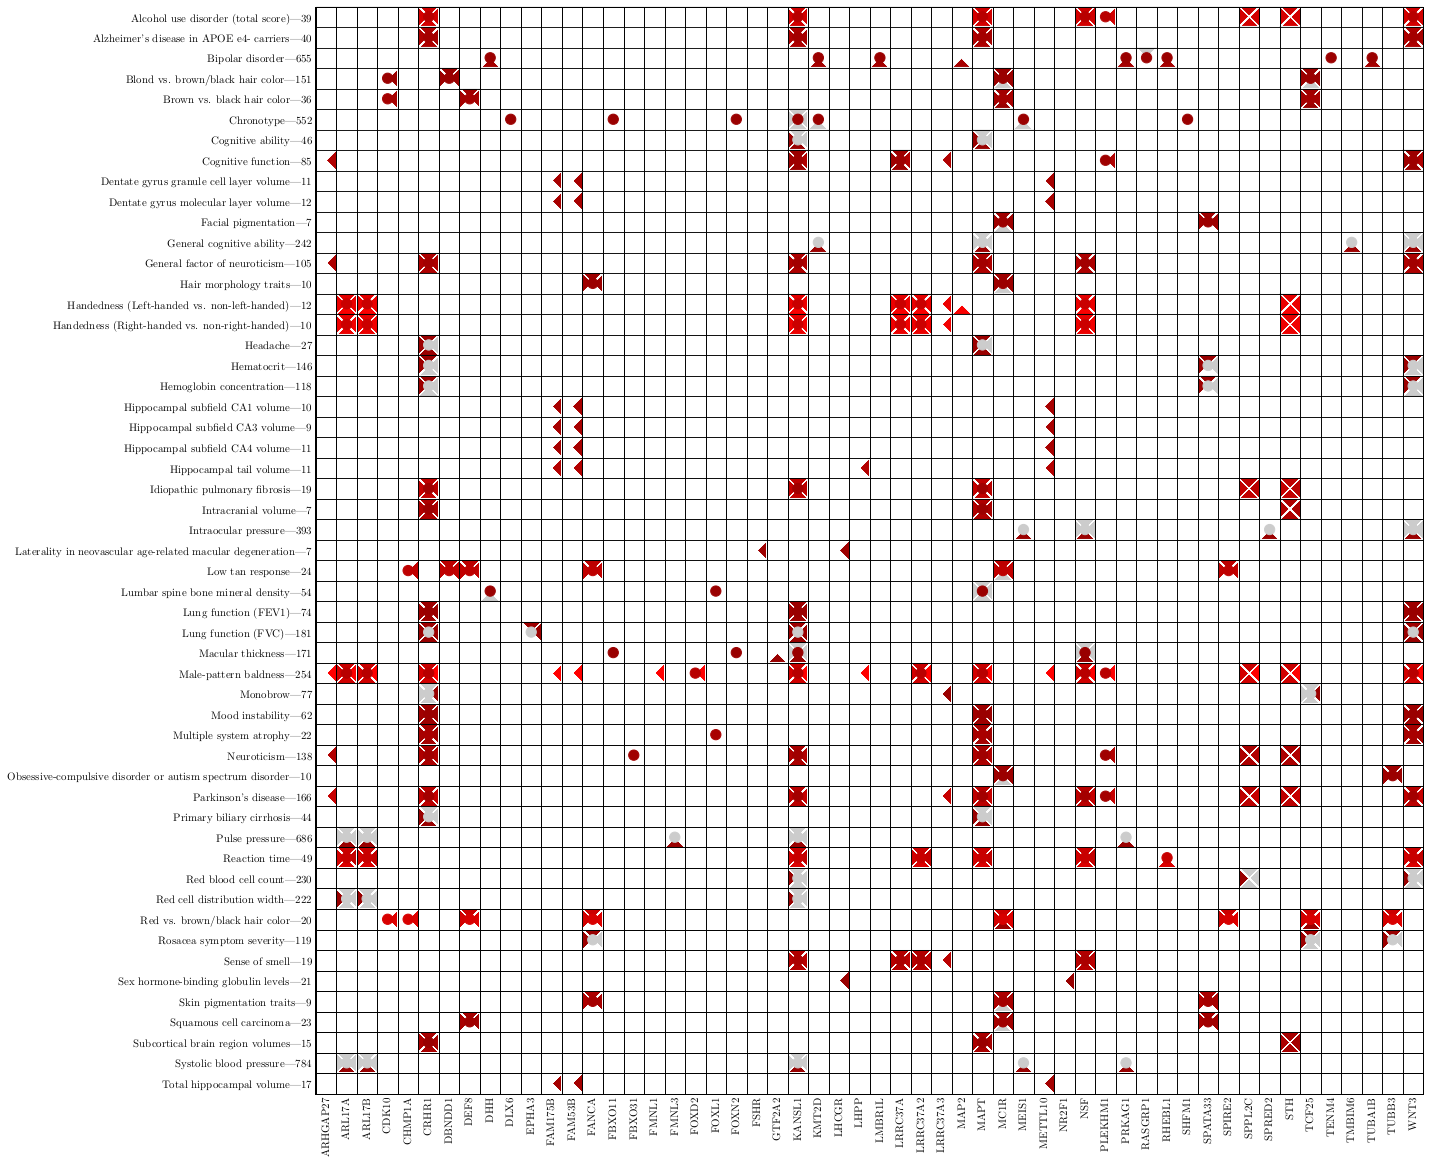

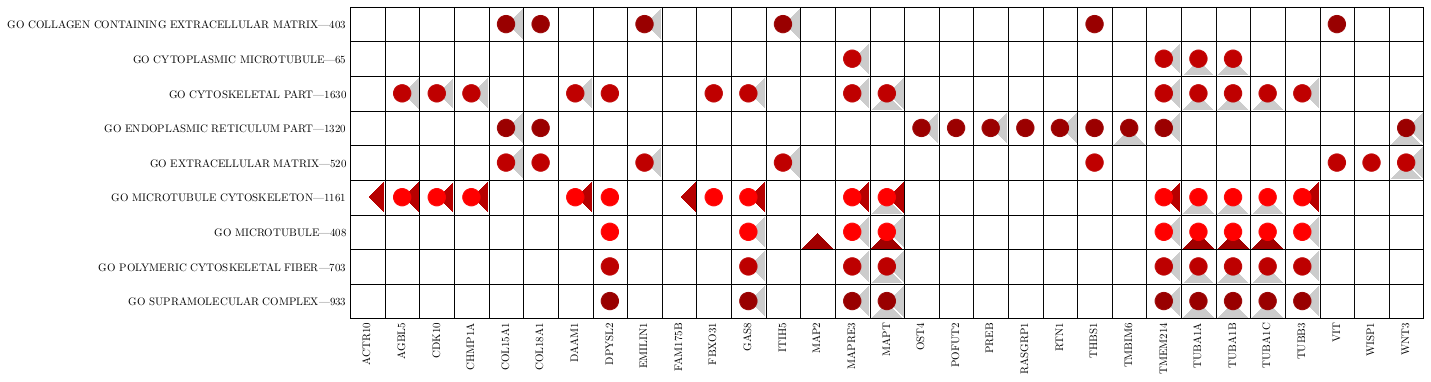

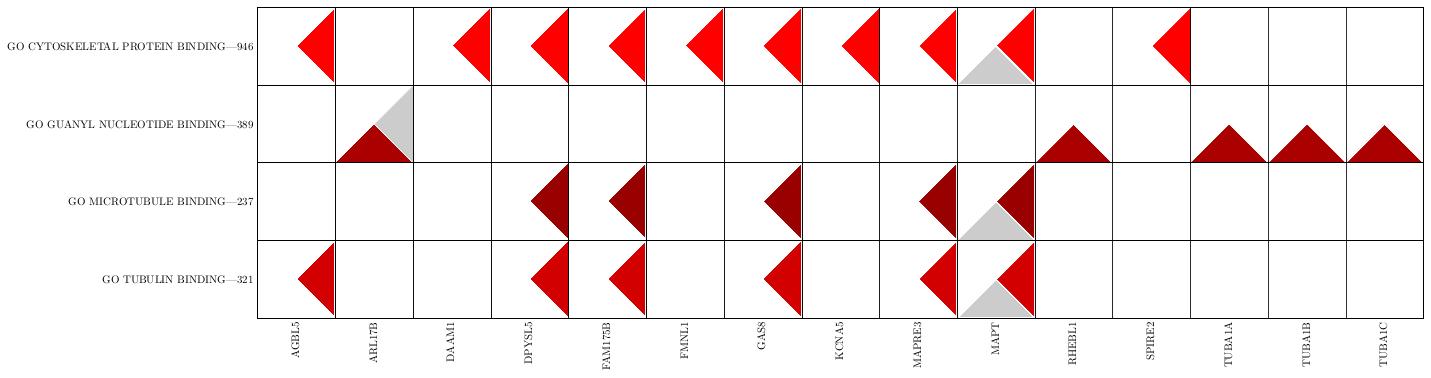

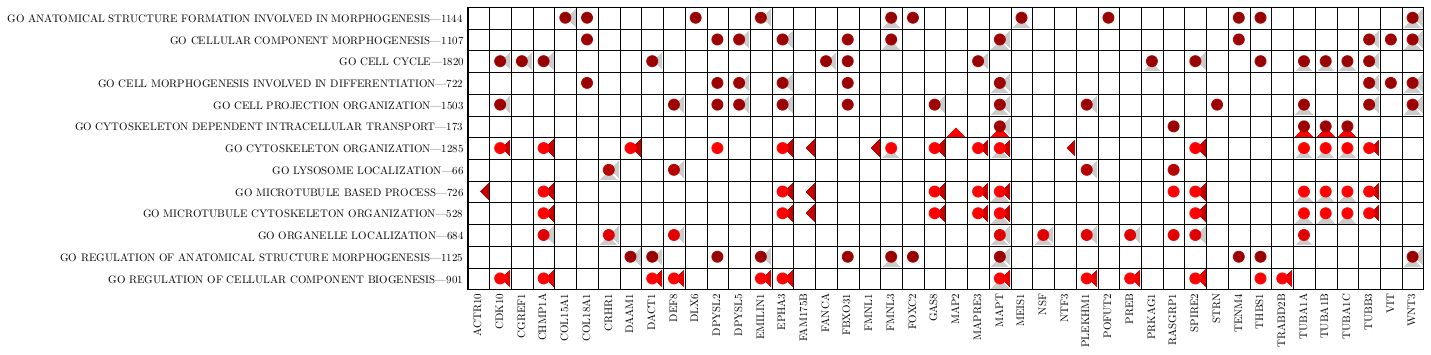

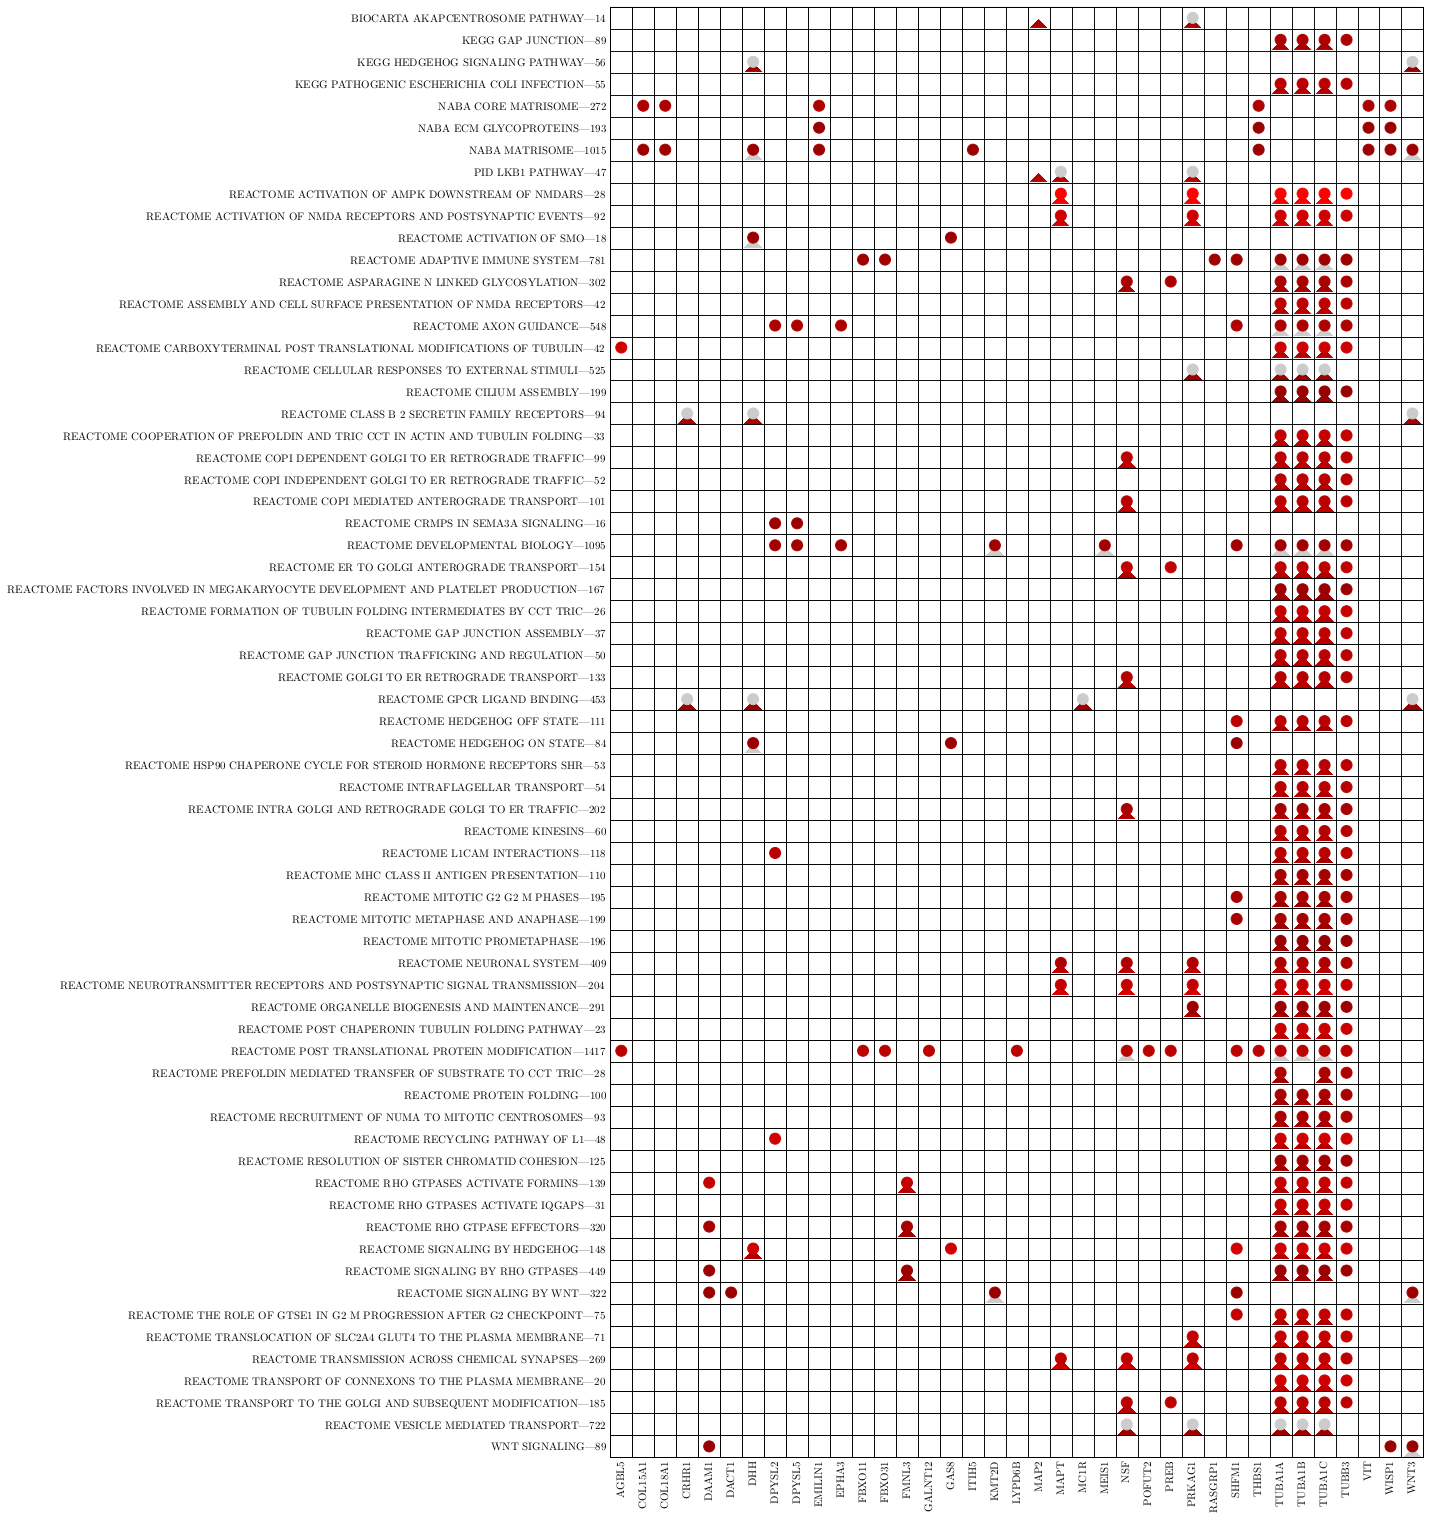

In [ ]:
for category in ['GWAScatalog',
'GO_cc',
 'GO_mf', 'GO_bp', 'Canonical_Pathways'
 ]:
    part_dfs = []
    for partition in [1,4,5,6,7]:
        part_dfs.append(
            genes_df.sort_values('adjP').query(f'(Category=="{category}") & (adjP<{top_val}) & (partition=={partition})').pivot_table(columns='gene', values='adjP',index='label'))
    fig = create_gene_to_trait_per_partition(part_dfs,genes_sets,0)
    fig.savefig(os.path.join(OUTPUT_DIR, 'genes_' + category + '.pdf'),bbox_inches="tight")


[ 1  2  3  4  5  6  7  8  9 13 14 15 18 19 20 23 24 27 28 29 32 33 34 37
 38 39 40 41 42 43 44 48 49 51 52 53]


<ipython-input-92-3177e0d86430>:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals[c][np.meshgrid(df_genes_ind,df_traits_ind)] = df.values


IndexError: index 53 is out of bounds for axis 0 with size 53